<a href="https://colab.research.google.com/github/pbcong/hand-writing-recognition/blob/main/model-building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/A_Z Handwritten Data.csv').astype('float32')
df.rename(columns={'0':'label'}, inplace=True)

In [ ]:
df.label.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

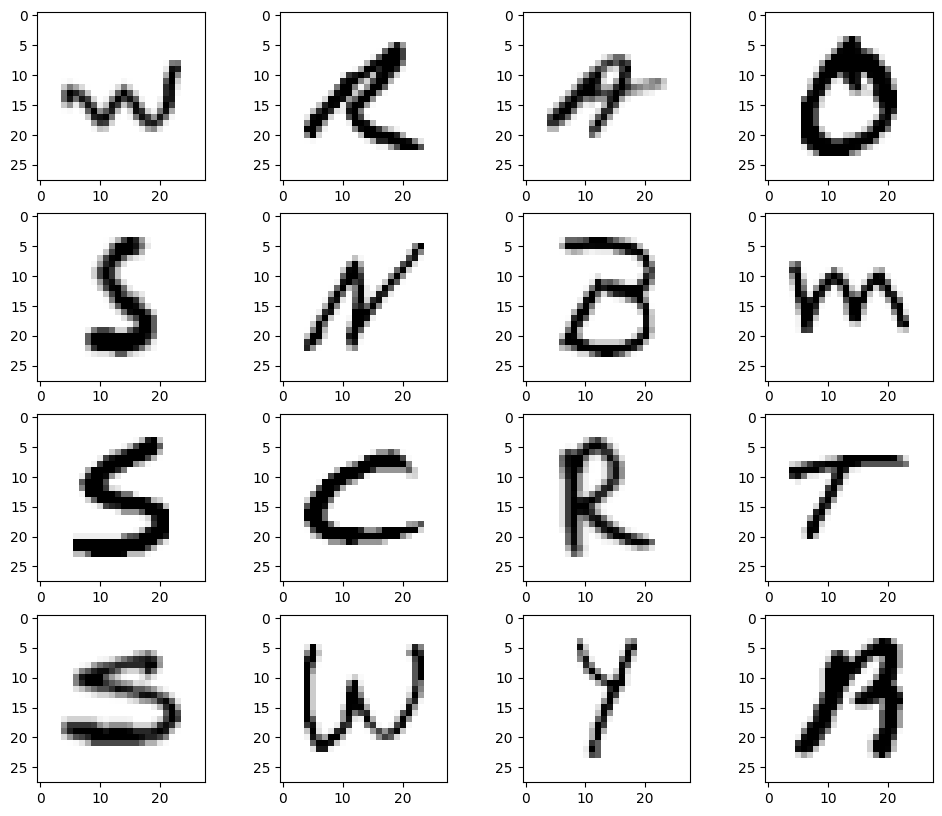

In [ ]:
from sklearn.utils import shuffle

X_shuffle = shuffle(df)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i, 1:].values.reshape(28,28), cmap='Greys')
plt.show()

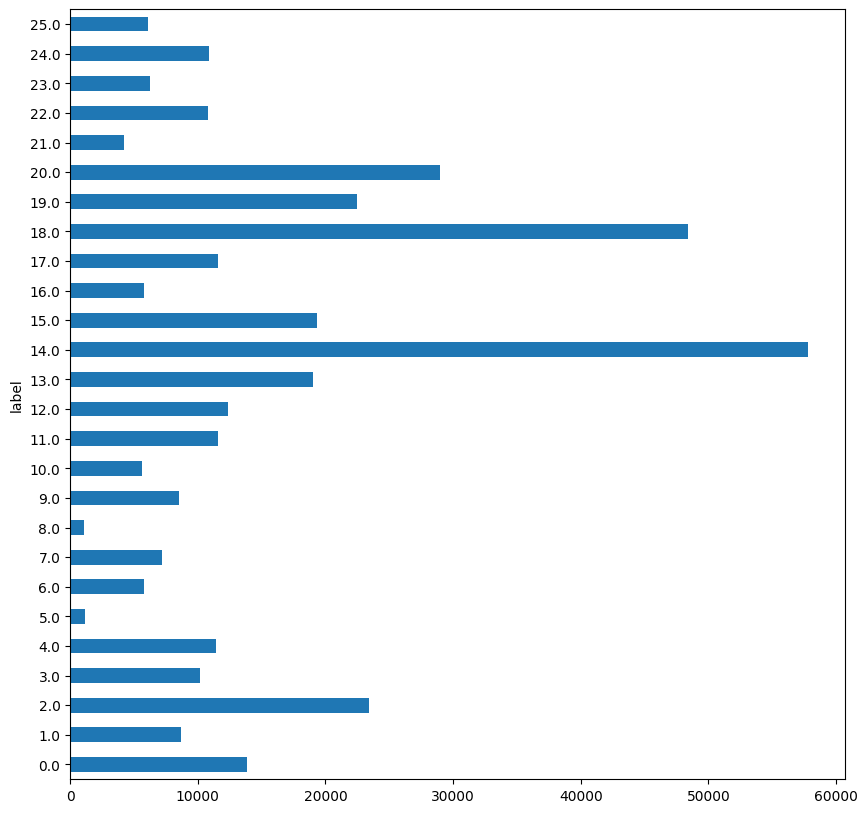

In [ ]:
label_size = df.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()
#0=A, 1=B and so on
#low number of i(8.0) and f(5.0)

In [ ]:
#!pip install np_utils

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:, 1:],df.label, test_size=0.2)
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(f"y_train data type: {y_train.dtype}")
print(f"y_test data type: {y_test.dtype}")

y_train data type: float32
y_test data type: float32


In [ ]:
X_train.max()

1.0

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [ ]:
model=keras.Sequential([
  Conv2D(32, (3,3), 1, input_shape=(28, 28, 1), activation='relu'),
  MaxPooling2D(),
  Conv2D(32, (3,3), 1, activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(256,activation='relu'),
  Dense(26, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [ ]:
early_stopping=keras.callbacks.EarlyStopping(
  min_delta=0.001,
  patience=10,
  restore_best_weights=True
)

In [ ]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.output.shape

TensorShape([None, 26])

In [ ]:
history=model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=100,
    callbacks=early_stopping
)

Epoch 1/100
2328/2328 [==============================] - 218s 94ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.0252 - val_accuracy: 0.9939
Epoch 2/100
2328/2328 [==============================] - 173s 74ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.0266 - val_accuracy: 0.9941
Epoch 3/100
2328/2328 [==============================] - 163s 70ms/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.0317 - val_accuracy: 0.9931
Epoch 4/100
2328/2328 [==============================] - 167s 71ms/step - loss: 0.0070 - accuracy: 0.9976 - val_loss: 0.0343 - val_accuracy: 0.9932
Epoch 5/100
2328/2328 [==============================] - 167s 72ms/step - loss: 0.0062 - accuracy: 0.9978 - val_loss: 0.0288 - val_accuracy: 0.9952
Epoch 6/100
2328/2328 [==============================] - 170s 73ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.0342 - val_accuracy: 0.9938
Epoch 7/100
2328/2328 [==============================] - 170s 73ms/step - loss: 0.0054 - accuracy: 0.9982 - val_

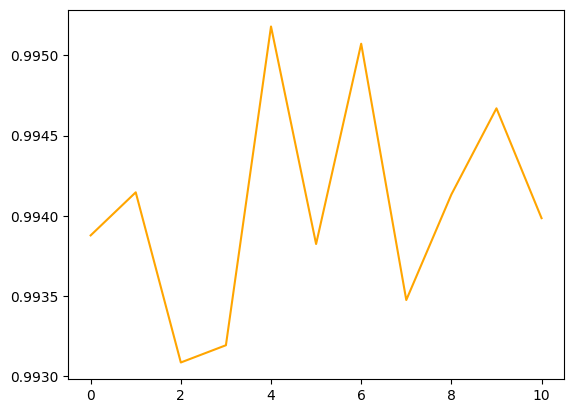

In [ ]:
plt.plot(history.history['val_accuracy'], color = 'orange')
plt.show()

In [ ]:
model.save('/content/gdrive/MyDrive/models/handwriting.keras')